---
Bradley Antholz

Machine Learning Project 1: KNN with real data.

*Thank you to Professor Reza for permission to share this code.*

Note: My comments are separated by the lines you see here, Professor Reza's are not.

---

# Project \#1 Starter Code:
Your first step is to decide which dataset you would like to work with for this project.

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify).

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

---
This is a university ranking across the world from the list above, and it aims at ranking Universities with different measures.

My goal is to try and see if there are variables that are more correlated to the final score than others, and then find out *why* one is better than the other.

---

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

---

I manualy added the State and State Rank columns (I did this because I wanted to know what states had the most ranked universities) and replaced every bad character (due to bad excel formatting) with the correct letters.

I also deleted rankings past 500, because I don't really need 2000 universities when I can have a good idea with 500.

Last, I filled all null values with N/A, which were only in the columns I added.

---

In [25]:
# load and preapre your data here:
from google.colab import drive
drive.mount('/content/drive')

# importing
import os
import numpy as np
import pandas as pd
path = '/content/drive/MyDrive/CS167/datasets/WORLD_UNIVERSITY_RANKINGS.csv'
data = pd.read_csv(path)
data.head()

# cleaning up the dataset
data = data.fillna({'State': 'N/A', 'State Rank': 'N/A'})
data.loc[0:99] # looking good so far. Ready to start extracting data.
data.head()
column_names = data.columns.tolist()
print(column_names)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,World Rank,Institution,Location,State,State Rank,Country Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,MA,1.0,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,MA,2.0,2,4,12,2,7,96.7
2,3,Stanford University,USA,CA,1.0,3,11,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,N/A,N/A,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,N/A,N/A,2,7,27,9,4,93.3


# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors (Unnormalized and normalized)__
- __weighted k Nearest Neighbors (Unnormalized and normalized)__
- __decision tree__
- __random forest__

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data.


Normalized KNN R^2:  0.9930894666830975


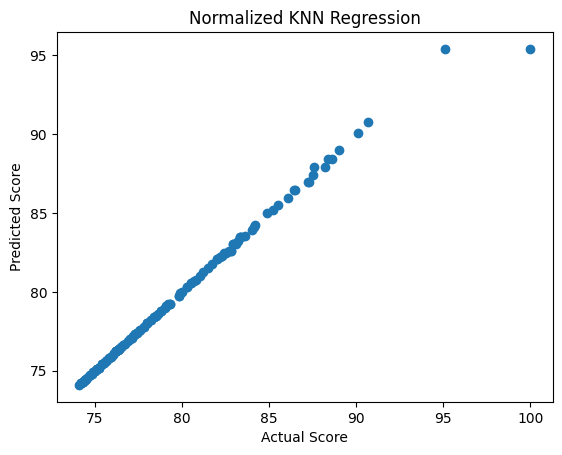

Unnormalized KNN R^2:  0.3884140981110459


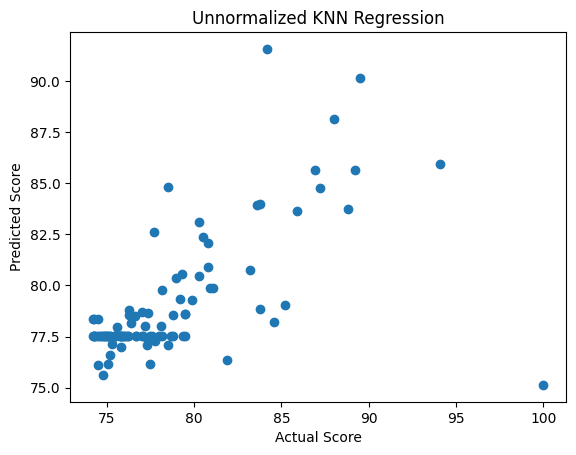

Weighted Normalized KNN R^2:  0.9802349435199956


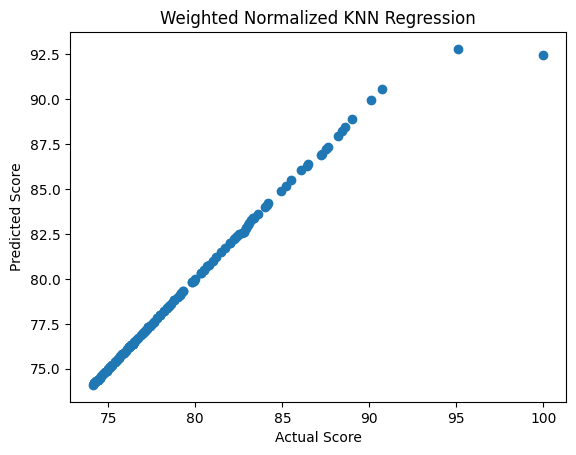

Weighted Unnormalized KNN R^2:  0.6467303398967987


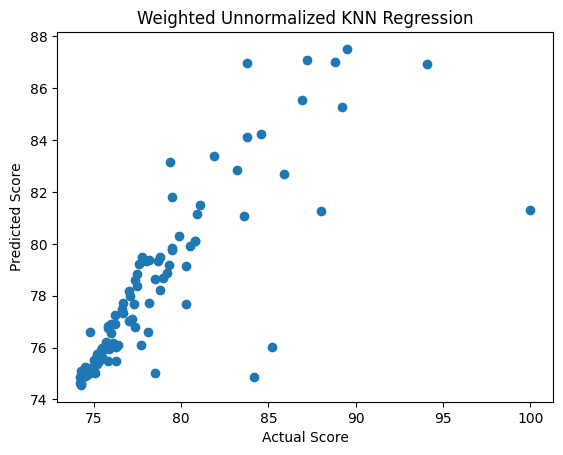

Normalized Decision Tree R^2:  0.7410132417438333


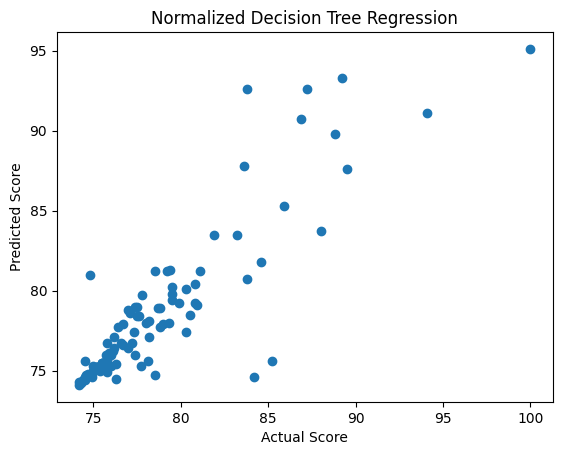

Unnormalized Decision Tree R^2:  0.44566963094480916


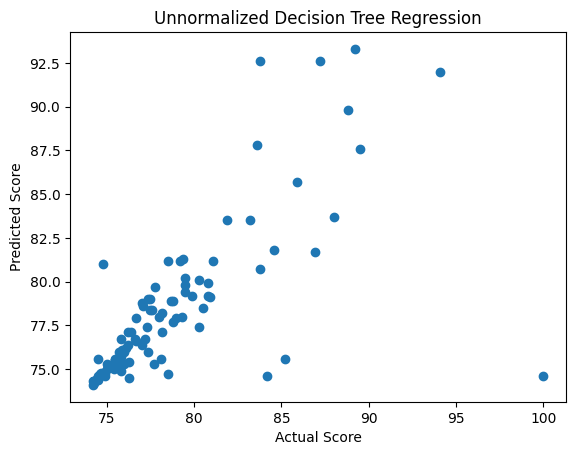

Normalized Random Forest R^2:  0.7869535063305364


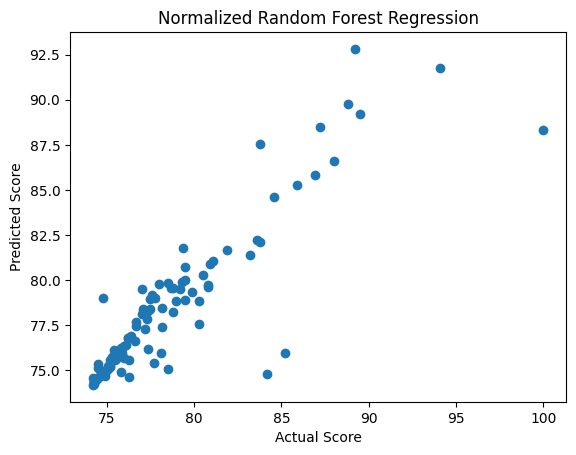

Unnormalized Random Forest R^2:  0.5863995463454481


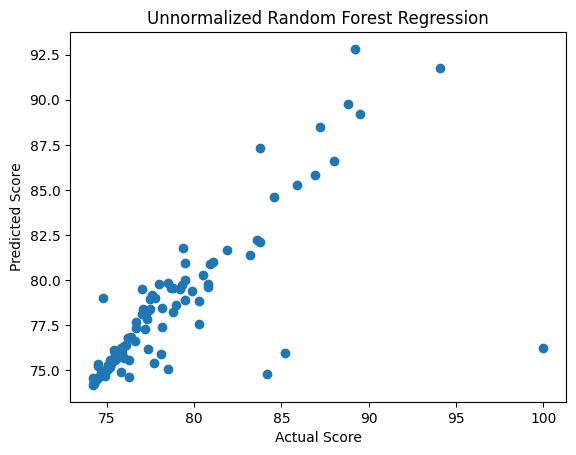

In [59]:
# Step 1: Importing and minor cleaning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

# Ensure all relevant columns are numeric, otherwise the null values will throw errors
clean_cols = ['Education Rank', 'Faculty Rank', 'Employability Rank', 'Research Rank']
data[clean_cols] = data[clean_cols].apply(lambda col: pd.to_numeric(col, errors='coerce').fillna(col.mean()))


# Step 2: Start research

# 1a. KNN Normalized
research = ['Education Rank', 'Faculty Rank']
target = 'Score'

X = data[research]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
print("Normalized KNN R^2: ", metrics.r2_score(y_test, predictions))

plt.scatter(y_test, predictions)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Normalized KNN Regression')
plt.show()

# 1b. KNN Unnormalized
target = 'Score'
predictors = ['Education Rank', 'Faculty Rank']

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size=0.2, random_state=41)

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(train_data, train_sln)


predictions = knn.predict(test_data)
print("Unnormalized KNN R^2: ", metrics.r2_score(test_sln, predictions))

plt.scatter(test_sln, predictions)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Unnormalized KNN Regression')
plt.show()



# 2a. Weighted Normalized KNN
research = ['Employability Rank','Research Rank']
target = 'Score'

X = data[research]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

w_knn = neighbors.KNeighborsRegressor(n_neighbors=12, weights='distance')
w_knn.fit(X_train, y_train)

preds = w_knn.predict(X_test)

print("Weighted Normalized KNN R^2: ", metrics.r2_score(y_test, preds))

plt.scatter(y_test, preds)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Weighted Normalized KNN Regression')
plt.show()

# 2b. Weighted Unnormalized KNN
target = 'Score'
predictors = ['Employability Rank', 'Research Rank']

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size=0.2, random_state=41)

w_knn = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
w_knn.fit(train_data, train_sln)

predictions = w_knn.predict(test_data)
print("Weighted Unnormalized KNN R^2: ", metrics.r2_score(test_sln, predictions))

plt.scatter(test_sln, predictions)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Weighted Unnormalized KNN Regression')
plt.show()




# 3a. Normalized Decision Tree
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data)

dt = tree.DecisionTreeRegressor()
dt.fit(X_scaled, train_sln)
preds = dt.predict(scaler.transform(test_data))

print("Normalized Decision Tree R^2: ", metrics.r2_score(test_sln, preds))

plt.scatter(test_sln, preds)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Normalized Decision Tree Regression')
plt.show()

# 3b. Unnormalized Decision Tree
dt = tree.DecisionTreeRegressor()
dt.fit(train_data, train_sln)
preds = dt.predict(test_data)

print("Unnormalized Decision Tree R^2: ", metrics.r2_score(test_sln, preds))

plt.scatter(test_sln, preds)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Unnormalized Decision Tree Regression')
plt.show()

# 4a. Normalized Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_scaled, train_sln)

rf_preds = rf.predict(scaler.transform(test_data))

print("Normalized Random Forest R^2: ", metrics.r2_score(test_sln, rf_preds))

plt.scatter(test_sln, rf_preds)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Normalized Random Forest Regression')
plt.show()


# 4b. Unnormalized Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(train_data, train_sln)

rf_preds = rf.predict(test_data)

print("Unnormalized Random Forest R^2: ", metrics.r2_score(test_sln, rf_preds))

plt.scatter(test_sln, rf_preds)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Unnormalized Random Forest Regression')
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |          .3884        |       .9931         |           2          |
| w-kNN         |         .6467           |         .9802       |          5           |
| decision tree |            .4528        |        .7445        |          12           |
| random forest |           .5864         |         .7870       |            20         |

---

| **Predictor** | **Average R^2** |
|---------------|--------------------|
| Research Rank           |          .6069        |
| Faculty Rank         |         .4573           |
| Education Rank |            .2017        |
| Employability Rank |           .0567         |

---



---

*Note*: *I created the second chart, and the scores are found by: Normal/Unnormal KNN, Weighted Normal/Unnormal KNN; then average the scores (when k = 1, 5, 10, 20 for simplicity) and voilà. The point of this is to make it clear that our results are correct, as our best results were with weighted KNN and our predictors being Employability and Research rank.*

These results were not what I was expecting, I thought for sure, as a college student, that Education and Faculty would be the most correlated to the final score, but upon further review the results do make sense. This is because there isn't a set scale for the "quality of education", nor "whether alumni get good jobs" (and by default, what is a "good job"), but what *is* known is a universities research and staff. For example, if Stanford were to lead a study into whether increased stress causes lack of sleep, the public knows immediately who is leading the study, and the name of the university attached. In my opinion, this is why we get the results we do. Public data.

The best regressor was by far Weighted KNN, with the highest unnormalized KNN (.65) and barely the second highest normalized KNN(.98). The worst regressor is decision tree, with the second lowest unnormalized score (.45) and lowest normalized score (.7445). This type of data isn't meant for a decision tree, as there aren't many different branches that exist (we have 5 variables). Weighted KNN is the best because it is great at knowing if a score is close to one another, allowing the top schools to weigh more heavily if their ranks are consistent.

Overall, although I didn't get my prediction right, I am not shocked by the outcome, and am glad I now know how these rankings are put together.

---

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

---

When I first did this, I had many issues, but upon reviewing I had less trouble. I first realized that I was unintentionally skewing my data by only basing results off two variables, so I had to redo some of it and create a new block of code for the average r^2 scores. This confirmed our answers, so no sweat. Other than that and of course, random coding errors, there was no major issues. My original score on this was 24.5/25 and I didn't feel the need to change much. Again, thank you to Professor Reza for allowing me to use this.

---